## Downloading and decoding datset

In [0]:
!wget "http://horatio.cs.nyu.edu/mit/silberman/nyu_depth_v2/nyu_depth_v2_labeled.mat"

--2019-01-19 10:45:09--  http://horatio.cs.nyu.edu/mit/silberman/nyu_depth_v2/nyu_depth_v2_labeled.mat
Resolving horatio.cs.nyu.edu (horatio.cs.nyu.edu)... 216.165.22.17
Connecting to horatio.cs.nyu.edu (horatio.cs.nyu.edu)|216.165.22.17|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2971894459 (2.8G)
Saving to: ‘nyu_depth_v2_labeled.mat’

nyu_depth_v2_labele 100%[===================>]   2.77G  30.9MB/s    in 88s     

2019-01-19 10:46:37 (32.3 MB/s) - ‘nyu_depth_v2_labeled.mat’ saved [2971894459/2971894459]



In [0]:
import numpy as np
import h5py 
f = h5py.File('./nyu_depth_v2_labeled.mat','r') 
# data = f.get('') 
# data = np.array(data) 

In [0]:
for key in f.keys():
   print(key)

#refs#
#subsystem#
accelData
depths
images
instances
labels
names
namesToIds
rawDepthFilenames
rawDepths
rawRgbFilenames
sceneTypes
scenes


In [0]:
images = f['images'][()]
depths = f['depths'][()]

In [0]:
images[0].shape

(3, 640, 480)

In [0]:
clean_images = []

In [0]:
for image in images:
    img_ = np.empty([480, 640, 3])
    img[:,:,0] = image[0,:,:].T
    img[:,:,1] = image[1,:,:].T
    img[:,:,2] = image[2,:,:].T
    clean_images.append(img)

In [0]:
clean_depths = []

In [0]:
for image in depths:
    img_ = np.empty([480, 640, 3])
    img[:,:,0] = image[:,:].T
    img[:,:,1] = image[:,:].T
    img[:,:,2] = image[:,:].T
    clean_depths.append(img)

In [0]:
clean_depths[0].shape

(480, 640, 3)

In [0]:
np.save('clean_images', clean_images)

In [0]:
np.save('clean_depths', clean_depths)

In [0]:
!du -h ./clean_depths.npy

1.3G	./clean_depths.npy


In [0]:
!du -h ./clean_images.npy

1.3G	./clean_images.npy


In [0]:
import skimage.io as io

In [0]:
img_ = clean_depths[4]

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


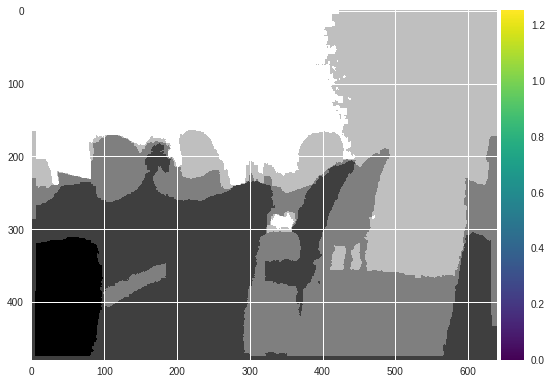

In [0]:
io.imshow(img_/4.0)
io.show()

In [0]:
f['labels'].shape

(1449, 640, 480)

In [0]:
f['namesToIds'][0]

array([3707764736,          2,          1,          1,          1,
                1], dtype=uint32)

## Install YOLO

In [0]:
# We will be using a forked version of Darknet which 
# allows us to suppress the display from OpenCV, when running
# object detection on videos
!ls
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/

clean_depths.npy  nyu_depth_v2_labeled.mat    sample_data
clean_images.npy  nyu_depth_v2_labeled.mat.1
Cloning into 'darknet'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 8380 (delta 1), reused 0 (delta 0), pack-reused 8376
Receiving objects: 100% (8380/8380), 8.63 MiB | 19.54 MiB/s, done.
Resolving deltas: 100% (5635/5635), done.


In [0]:
!ls
%cd darknet
!ls
% cd ..


clean_depths.npy  darknet		    nyu_depth_v2_labeled.mat.1
clean_images.npy  nyu_depth_v2_labeled.mat  sample_data
/content/darknet
3rdparty	  data			 LICENSE	src
build		  image_yolov2.sh	 Makefile	video_v2.sh
cfg		  image_yolov3.sh	 net_cam_v3.sh	video_yolov3.sh
darknet.py	  include		 README.md
darknet_video.py  json_mjpeg_streams.sh  scripts
/content


In [0]:
#Installing CUDA pre-requisites
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb

--2019-01-19 11:12:10--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 192.229.162.216
Connecting to developer.nvidia.com (developer.nvidia.com)|192.229.162.216|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?7AhTe7mN1mhYi6o-4fztnnOOm626Jtq_x4z2QFjqeOgL3kaWc_3dWvnME0kzf7YuV0BSTvOIYuYlZCaPXZ6P5Aro2Hk8TLtIJvhBr5KjZ_fGtZyq3FV3BOqdeGZR4IKAxliu_eop6kEpdMUUpHpjzKvyPtcbEA3vV_AmqlH3zhCLodSC72qx-NE9jbwe4EEv2gOC1GO74YMW9oxEFZcbNJVudA [following]
--2019-01-19 11:12:11--  https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?7AhTe7mN1mhYi6o-4fztnnOOm626Jtq_x4z2QFjqeOgL3kaWc_3dWvnME0kzf7YuV0BSTvOIYuYlZCaPXZ6P5Aro2Hk8

In [0]:
!apt update

Get:1 file:/var/cuda-repo-8-0-local-ga2  InRelease
Ign:1 file:/var/cuda-repo-8-0-local-ga2  InRelease
Get:2 file:/var/cuda-repo-8-0-local-ga2  Release [574 B]
Get:2 file:/var/cuda-repo-8-0-local-ga2  Release [574 B]
Get:3 file:/var/cuda-repo-8-0-local-ga2  Release.gpg [819 B]
Get:3 file:/var/cuda-repo-8-0-local-ga2  Release.gpg [819 B]
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Get:5 file:/var/cuda-repo-8-0-local-ga2  Packages [22.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Get:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [83.2 kB]
Hit:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release
Hit:11 http://archive.ubuntu.com/ubuntu bionic InRe

In [0]:
#Installing CUDA
!apt install cuda-8-0 -y

# If there is an issue installing CUDA, 
# try installing cuda-visual-tools again
# Comment the earlier command to install cuda
# Uncomment and run the below command

#!apt --fix-broken install cuda-visual-tools-8-0 -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cuda-command-line-tools-8-0 cuda-core-8-0 cuda-cublas-8-0
  cuda-cublas-dev-8-0 cuda-cudart-8-0 cuda-cudart-dev-8-0 cuda-cufft-8-0
  cuda-cufft-dev-8-0 cuda-curand-8-0 cuda-curand-dev-8-0 cuda-cusolver-8-0
  cuda-cusolver-dev-8-0 cuda-cusparse-8-0 cuda-cusparse-dev-8-0
  cuda-demo-suite-8-0 cuda-documentation-8-0 cuda-driver-dev-8-0
  cuda-license-8-0 cuda-misc-headers-8-0 cuda-npp-8-0 cuda-npp-dev-8-0
  cuda-nvgraph-8-0 cuda-nvgraph-dev-8-0 cuda-nvml-dev-8-0 cuda-nvrtc-8-0
  cuda-nvrtc-dev-8-0 cuda-runtime-8-0 cuda-samples-8-0 cuda-toolkit-8-0
  cuda-visual-tools-8-0
The following NEW packages will be installed:
  cuda-8-0 cuda-command-line-tools-8-0 cuda-core-8-0 cuda-cublas-8-0
  cuda-cublas-dev-8-0 cuda-cudart-8-0 cuda-cudart-dev-8-0 cuda-cufft-8-0
  cuda-cufft-dev-8-0 cuda-curand-8-0 cuda-curand-dev-8-0 cuda-cusolver-8-0
  cuda-cuso

In [0]:
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'

In [0]:
#Installing compilers
!apt install gcc-5 g++-5 -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cpp-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0 libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
0 upgraded, 9 newly installed, 0 to remove and 62 not upgraded.
Need to get 29.1 MB of archives.
After this operation, 100 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 gcc-5-base amd64 5.5.0-12ubuntu1 [17.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libisl15 amd64 0.18-4 [548 kB]
Get:3 http://arch

In [0]:
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc 
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++

In [0]:
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'

In [0]:
#Changing the variables to include OpenCV and GPU in the Makefile
% cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
#!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile

/content/darknet


In [0]:
# And this is how our Makefile looks now
# Check if OPENCV = 1 and GPU = 1
!cat Makefile

In [0]:
# Apparently we need to install this so that OpenCV can work without any issues
# when we are making the file
!apt-get install libopencv-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.


In [0]:
#Running make!
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -Iinclude/  -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/http_stream.cpp -o obj/http_stream.o
In file included from ./src/http_stream.h:4:0,
                 from ./src/http_stream.cpp:1:
include/darknet.h:48:16: warning: ‘typedef’ was ignored in this declaration
 typedef struct network_state;
                ^
./src/http_stream.cpp: In member function ‘bool MJPG_sender::write(const cv::Mat&)’:
./src/http_stream.cpp:255:23: warning: comparison between signed and unsigned integer expressions [-Wsign-compare]
                 if (n < outlen)
                       ^
./src/http_stream.cpp: In member function ‘void JSON_sender::close_all()’:
./src/http_stream.cpp:324:20: warning: ISO C++ forbids converting a string constant to ‘char*’ [-Wwrite-strings]
         write("\n]");   // close JSON ar

In [0]:
# Downloading YOLO weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2019-01-19 11:17:02--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  77.9MB/s    in 3.0s    

2019-01-19 11:17:05 (77.9 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [0]:
# Let's see if it can detect object without any issues.
# Here is an example from YOLO
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

In [0]:
!ls

3rdparty    darknet_video.py	   LICENSE	    results
backup	    data		   Makefile	    scripts
build	    image_yolov2.sh	   net_cam_v3.sh    src
cfg	    image_yolov3.sh	   obj		    video_v2.sh
darknet     include		   predictions.jpg  video_yolov3.sh
darknet.py  json_mjpeg_streams.sh  README.md	    yolov3.weights


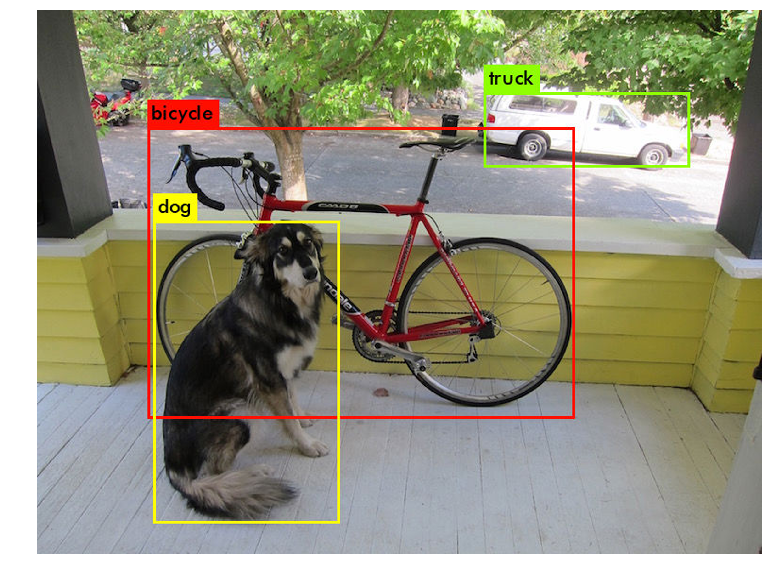

In [0]:
#The DOG, The TRUCK and The Bicycle!
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("predictions.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
#plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

In [0]:
import scipy.misc
scipy.misc.toimage(clean_images[5], cmin=0.0, cmax=...).save('0.jpg')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


# Test on NYU Depth Dataset V2

## On RGB and Depth Images using YOLO

### Image 0

#### RGB Image

In [0]:
!./darknet detect cfg/yolov3.cfg yolov3.weights ../0.png

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

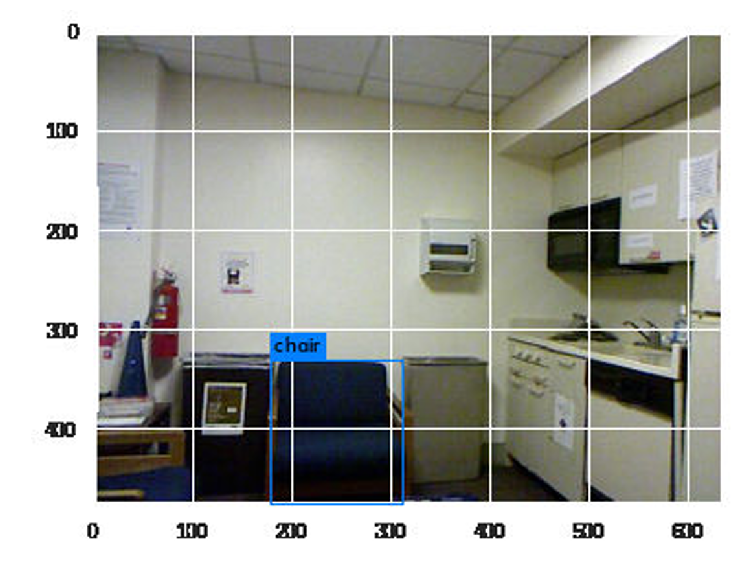

In [0]:
#The DOG, The TRUCK and The Bicycle!
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("predictions.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
#plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

#### Depth Image

In [0]:
!./darknet detect cfg/yolov3.cfg yolov3.weights ../0_depth.png

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

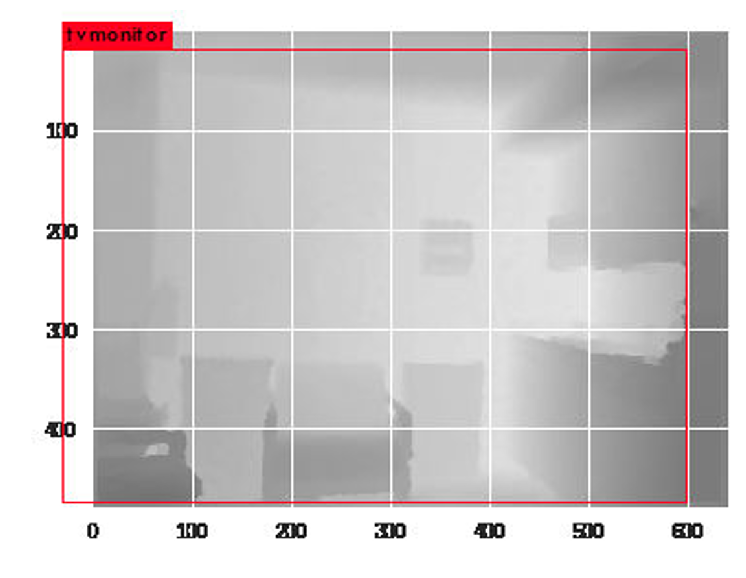

In [0]:
#The DOG, The TRUCK and The Bicycle!
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("predictions.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
#plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

### Image 40

#### RGB

In [0]:
!./darknet detect cfg/yolov3.cfg yolov3.weights ../../40.png

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

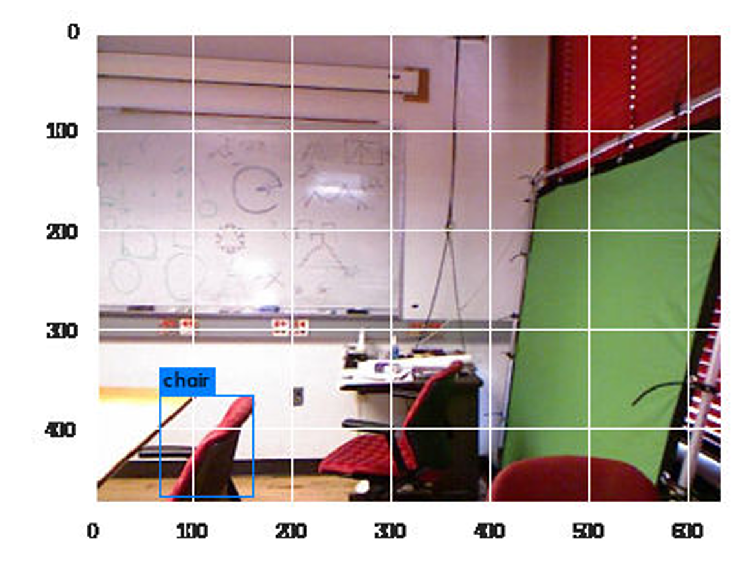

In [0]:
image = cv2.imread("predictions.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
#plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

#### Depth

In [0]:
!./darknet detect cfg/yolov3.cfg yolov3.weights ../../40_depth.png

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

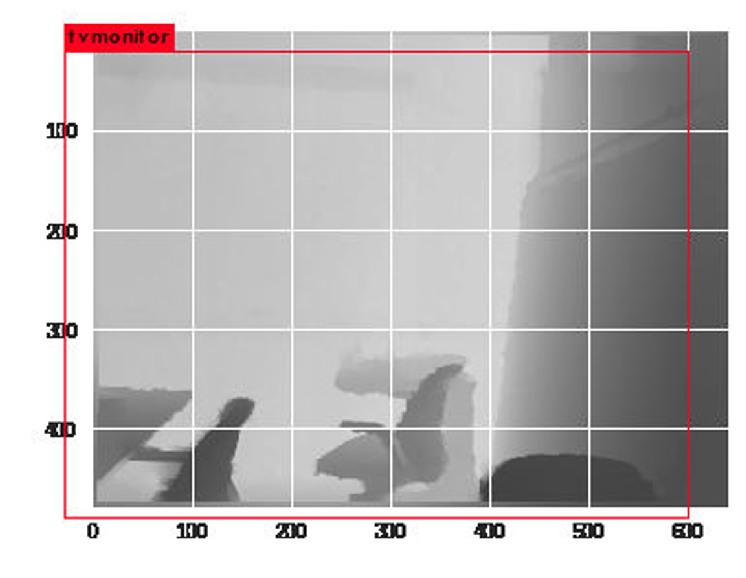

In [0]:
image = cv2.imread("predictions.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
#plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

### Conclusion

The detection on the depth datset is very bad.
We have to convert them in differnt format.

## On RGB and Depth Images using **RCNN**

In [0]:
!git clone https://www.bitbucket.org/juricap/ompc/

Cloning into 'ompc'...
remote: Mercurial (hg) is required to use this repository.
remote: 
remote: https://confluence.atlassian.com/x/vLRCMw
fatal: unable to access 'https://www.bitbucket.org/juricap/ompc/': The requested URL returned error: 405


In [0]:
from ompc import *

def getPointCloudFromZ(Z, C, s):
#function [x3 y3 z3] = getPointCloudFromZ(Z, C, s)
# Input: 
#   Z, C the camera matrix, s is the factor by which Z has been upsampled!?
# Output: 
#   the point cloud in x3, y3, z3;

    if (not exist(mstring('s'), mstring('var'))):
        s = 1;

    [H, W, gr] = size(Z)
    [xx, yy] = meshgrid(mslice[1:W], mslice[1:H])

    #% Color camera parameters
    cc_rgb = C(mslice[1:2], 3) * s
    fc_rgb = diag(C(mslice[1:2], mslice[1:2])) * s

    x3 = (xx - cc_rgb(1)) *elmul* Z / fc_rgb(1)
    y3 = (yy - cc_rgb(2)) *elmul* Z / fc_rgb(2)
    z3 = Z
    return [x3,y3,z3]





@mfunction("pc, N, yDir, h, pcRot, NRot")
def processDepthImage(z=None, missingMask=None, C=None):
    # function [pc, N, yDir, h, pcRot, NRot] = processDepthImage(z, missingMask, C)
    # Input: 
    #   z is in centimetres
    #   C is the camera matrix

    yDirParam.angleThresh = mcat([45, 15])
    yDirParam.iter = mcat([5, 5])
    yDirParam.y0 = mcat([0, 1, 0]).cT

    normalParam.patchSize = mcat([3, 10])

    [X, Y, Z] = getPointCloudFromZ(z, C, 1)
    pc = cat(3, X, Y, Z)

    # Compute the normals for this image
    [N1, b1] = computeNormalsSquareSupport(z /eldiv/ 100, missingMask, normalParam.patchSize(1), 1, C, ones(size(z)))
    [N2, b2] = computeNormalsSquareSupport(z /eldiv/ 100, missingMask, normalParam.patchSize(2), 1, C, ones(size(z)))
    # [N1 b1] = computeNormals2(pc(:,:,1), pc(:,:,2), pc(:,:,3), ones(size(pc(:,:,1))), normalParam.patchSize(1));
    # [N2 b2] = computeNormals2(pc(:,:,1), pc(:,:,2), pc(:,:,3), ones(size(pc(:,:,1))), normalParam.patchSize(2));

    N = N1

    # Compute the direction of gravity
    yDir = getYDir(N2, yDirParam)
    y0 = mcat([0, 1, 0]).cT
    R = getRMatrix(y0, yDir)
    NRot = rotatePC(N, R.cT)
    pcRot = rotatePC(pc, R.cT)
    h = -pcRot(mslice[:], mslice[:], 2)
    yMin = prctile(h(mslice[:]), 0)
    if (yMin > -90):
        yMin = -130
        end
        h = h - yMin
        end




@mfunction("HHA")
def saveHHA(imName=None, C=None, outDir=None, D=None, RD=None):
    # function HHA = saveHHA(imName, C, outDir, D, RD)


    if (isempty(D)):
        D = getImage(imName, mstring('depth'))
    if (isempty(RD)):
        RD = getImage(imName, mstring('rawdepth'))
    
    D = double(D) /eldiv/ 1000
    missingMask = RD == 0
    [pc, N, yDir, h, pcRot, NRot] = processDepthImage(D * 100, missingMask, C)
    angl = acosd(min(1, max(-1, sum(bsxfun(@, N, reshape(yDir, 1, 1, 3)), 3))))

    # Making the minimum depth to be 100, to prevent large values for disparity!!!
    pc(mslice[:], mslice[:], 3).lvalue = max(pc(mslice[:], mslice[:], 3), 100)
    I(mslice[:], mslice[:], 1).lvalue = 31000. / pc(mslice[:], mslice[:], 3)
    I(mslice[:], mslice[:], 2).lvalue = h
    I(mslice[:], mslice[:], 3).lvalue = (angl + 128 - 90)        #Keeping some slack
    I = uint8(I)

    # Save if can save
    if (not isempty(outDir) and not isempty(imName)):
        imwrite(I, fullfile_ext(outDir, imName, mstring('png')))
    HHA = I